# Figures 1

Generate figures matching theory and simulation of the propagation of length map in a random deep neural network.

## Setup

In [4]:
from __future__ import print_function
import os, sys
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['image.cmap'] = 'viridis'

# Add cornet and Theano to path
sys.path.insert(0, '../')
sys.path.insert(0, '/home/poole/Theano_clean')

# Output figure directory
figure_dir = "../writeup/figures"
results_dir = "../results"

## $q_{aa}$ on linear dropout networks (theory)

In [5]:
from network.theory import qmap
nq = 50; qmax = 15
qrange = np.linspace(0, qmax, nq)

qaa_li1 = np.zeros((nq));  qaa_li2 = np.zeros((nq)); qaa_li3 = np.zeros((nq))
weight_sigma = 0.5; bias_sigma = 1.5; rho1 = 1.0; rho2 = 0.7; rho3 = 0.4
for q in range(0, nq):
    qaa_li1[q] = qmap( qrange[q] , weight_sigma, bias_sigma, rho1, 'linear') 
    qaa_li2[q] = qmap( qrange[q] , weight_sigma, bias_sigma, rho2, 'linear') 
    qaa_li3[q] = qmap( qrange[q] , weight_sigma, bias_sigma, rho3, 'linear') 

## $q_{aa}$ on linear dropout networks (simulation)

In [6]:
from network.net import RandNet, DiyNet

n_hidden_layers = 1;  n_hidden_units = 1000
din = 1000;  npnts = 100
qaa_sli1 = np.zeros((nq,npnts));  qaa_sli2 = np.zeros((nq,npnts));  qaa_sli3 = np.zeros((nq,npnts))

net1 = RandNet(din, n_hidden_units, n_hidden_layers, rho1, 'linear', flip=True)
net1.Gaussian_randomize(bias_sigma=bias_sigma, weight_sigma=weight_sigma)
    
net2 = RandNet(din, n_hidden_units, n_hidden_layers, rho2, 'linear', flip=True)
net2.Gaussian_randomize(bias_sigma=bias_sigma, weight_sigma=weight_sigma)
    
net3 = RandNet(din, n_hidden_units, n_hidden_layers, rho3, 'linear', flip=True)
net3.Gaussian_randomize(bias_sigma=bias_sigma, weight_sigma=weight_sigma)
    
for q in range(0, nq):
    xs = np.random.randn(npnts, din) *  np.sqrt(qrange[q])
    h1 = net1.get_acts(xs)[1]; h2 = net2.get_acts(xs)[1]; h3 = net3.get_acts(xs)[1]
    qaa_sli1[q] = 1.0 / din * (h1**2).sum(-1)
    qaa_sli2[q] = 1.0 / din * (h2**2).sum(-1)
    qaa_sli3[q] = 1.0 / din * (h3**2).sum(-1)

C:\Users\weihuang\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## $q_{aa}$ on tanh dropout networks (theory)

In [7]:
from network.theory import qmap
nq = 50; qmax = 15
qrange = np.linspace(0, qmax, nq)

qaa_ta1 = np.zeros((nq));  qaa_ta2 = np.zeros((nq)); qaa_ta3 = np.zeros((nq))
weight_sigma = 2.5; bias_sigma = 0.5; rho1 = 1.0; rho2 = 0.7; rho3 = 0.4
for q in range(0, nq):
    qaa_ta1[q] = qmap( qrange[q] , weight_sigma, bias_sigma, rho1, 'tanh') 
    qaa_ta2[q] = qmap( qrange[q] , weight_sigma, bias_sigma, rho2, 'tanh') 
    qaa_ta3[q] = qmap( qrange[q] , weight_sigma, bias_sigma, rho3, 'tanh') 

## $q_{aa}$ on tanh dropout networks (simulation)

In [8]:
from network.net import RandNet, DiyNet

n_hidden_layers = 1;  n_hidden_units = 1000
din = 1000;  npnts = 100
qaa_sta1 = np.zeros((nq,npnts));  qaa_sta2 = np.zeros((nq,npnts));  qaa_sta3 = np.zeros((nq,npnts))

net1 = RandNet(din, n_hidden_units, n_hidden_layers, rho1, 'tanh', flip=True)
net1.Gaussian_randomize(bias_sigma=bias_sigma, weight_sigma=weight_sigma)
    
net2 = RandNet(din, n_hidden_units, n_hidden_layers, rho2, 'tanh', flip=True)
net2.Gaussian_randomize(bias_sigma=bias_sigma, weight_sigma=weight_sigma)
    
net3 = RandNet(din, n_hidden_units, n_hidden_layers, rho3, 'tanh', flip=True)
net3.Gaussian_randomize(bias_sigma=bias_sigma, weight_sigma=weight_sigma)
    
for q in range(0, nq):
    xs = np.random.randn(npnts, din) *  np.sqrt(qrange[q])
    h1 = net1.get_acts(xs)[1]; h2 = net2.get_acts(xs)[1]; h3 = net3.get_acts(xs)[1]
    qaa_sta1[q] = 1.0 / din * (h1**2).sum(-1)
    qaa_sta2[q] = 1.0 / din * (h2**2).sum(-1)
    qaa_sta3[q] = 1.0 / din * (h3**2).sum(-1)

## $c_{ab}$ on ReLU dropout networks (theory)

In [9]:
from network.theory import q_fixed_point, cmap
nc = 50
crange = np.linspace(0, 1.0, nc)
weight_sigma = 0.9; bias_sigma = 0.5;
caa_re1 = np.zeros((nq));  caa_re2 = np.zeros((nq)); caa_re3 = np.zeros((nq))

t,qstar1 = q_fixed_point(weight_sigma, bias_sigma, 'relu', rho1, qinit=1.0, tol_frac=0.01)
t,qstar2 = q_fixed_point(weight_sigma, bias_sigma, 'relu', rho2, qinit=1.0, tol_frac=0.01)
t,qstar3 = q_fixed_point(weight_sigma, bias_sigma, 'relu', rho3, qinit=1.0, tol_frac=0.01)
for c in range(0, nc):
    caa_re1[c] = cmap( qstar1, qstar1, crange[c]*qstar1, weight_sigma, bias_sigma, 'relu')/qstar1
    caa_re2[c] = cmap( qstar2, qstar2, crange[c]*qstar2, weight_sigma, bias_sigma, 'relu')/qstar2
    caa_re3[c] = cmap( qstar3, qstar3, crange[c]*qstar3, weight_sigma, bias_sigma, 'relu')/qstar3
        

## $c_{ab}$ on Erf dropout networks (theory)

In [11]:
from network.theory import q_fixed_point, cmap
nc = 50
crange = np.linspace(0, 1.0, nc)
weight_sigma = 0.9; bias_sigma = 0.5;
caa_er1 = np.zeros((nq));  caa_er2 = np.zeros((nq)); caa_er3 = np.zeros((nq))

t,qstar1 = q_fixed_point(weight_sigma, bias_sigma, 'erf2', rho1, qinit=1.0, tol_frac=0.01)
t,qstar2 = q_fixed_point(weight_sigma, bias_sigma, 'erf2', rho2, qinit=1.0, tol_frac=0.01)
t,qstar3 = q_fixed_point(weight_sigma, bias_sigma, 'erf2', rho3, qinit=1.0, tol_frac=0.01)
for c in range(0, nc):
    caa_er1[c] = cmap( qstar1, qstar1, crange[c]*qstar1, weight_sigma, bias_sigma, 'erf2')/qstar1
    caa_er2[c] = cmap( qstar2, qstar2, crange[c]*qstar2, weight_sigma, bias_sigma, 'erf2')/qstar2
    caa_er3[c] = cmap( qstar3, qstar3, crange[c]*qstar3, weight_sigma, bias_sigma, 'erf2')/qstar3  

# Figure 1:  The iterative squared length mapping of $q_{aa}^l$ and $c_{ab}^l$
The iterative squared length mapping of $q_{aa}^l$ and $c_{ab}^l$ with different activations and dropout rates. (a) The iterative length map of $q^l_{aa}$ in  Linear network at $\sigma_w = 0.5$ and $\sigma_b = 1.5$. Theoretical predictions (solid lines) match well with network simulations (dots) within a standard error (shadow). The intersection between map and unity line determine its fixed points $q^\ast_{ab}$. Different color correspond to different dropout rates: $\rho = 1$ is red, $\rho = 0.7$ is green, and $\rho = 0.4$ is blue. (b) The iterative length map of $q^l_{aa}$ in Tanh network at $\sigma_w = 2.5$ and $\sigma_b = 0.5$. (c) The iterative length map of $c^l_{ab}$ in ReLU network at $\sigma_w = 0.9$ and $\sigma_b = 0.5$. Only intersection of network at $\rho = 1$ (red) is $c^\ast_{ab} = 1$, the others are $c^\ast_{ab} < 1$. (d) The iterative length map of $c^l_{ab}$ in Erf network at $\sigma_w = 0.9$ and $\sigma_b = 0.5$. Again, $c^\ast_{ab} = 1$ only holds at $\rho = 1$.

Text(0.5,1,'Erf')

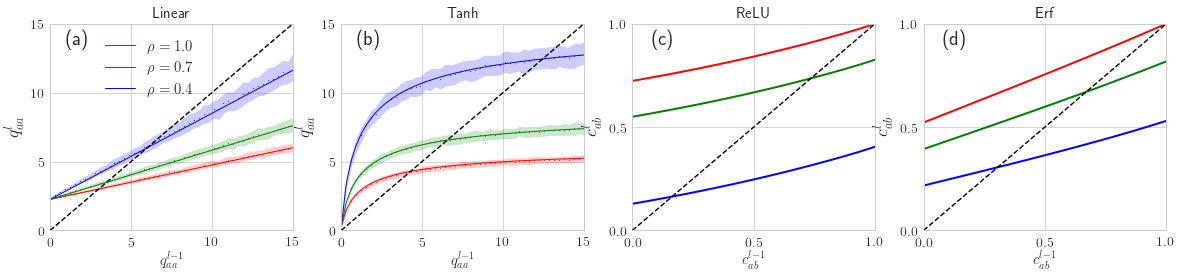

In [13]:
plt.figure(figsize=(20, 3.8))
gs = plt.GridSpec(1, 4)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

plt.subplot(gs[0, 0])
plt.xticks([0, 5, 10, 15]); plt.yticks([0, 5, 10, 15]); plt.xlim(0, 15); plt.ylim(0, 15)
plt.plot(qrange, qaa_li1, color='red', lw=1, label=r'$\rho = 1.0$')
plt.plot(qrange, qaa_sli1.mean(-1),marker='o',markersize=1, ls='none',color='red')
plt.fill_between(qrange, qaa_sli1.mean(-1)-qaa_sli1.std(-1), qaa_sli1.mean(-1)+qaa_sli1.std(-1), alpha=0.2, label='_nolegend_', color='red')

plt.plot(qrange, qaa_li2, color='green', lw=1,label=r'$\rho = 0.7$' )
plt.plot(qrange, qaa_sli2.mean(-1),marker='o',markersize=1, ls='none',color='green')
plt.fill_between(qrange, qaa_sli2.mean(-1)-qaa_sli2.std(-1), qaa_sli2.mean(-1)+qaa_sli2.std(-1), alpha=0.2, label='_nolegend_', color='green')

plt.plot(qrange, qaa_li3, color='blue', lw=1,label=r'$\rho = 0.4$' )
plt.plot(qrange, qaa_sli3.mean(-1),marker='o',markersize=1, ls='none',color='blue')
plt.fill_between(qrange, qaa_sli3.mean(-1)-qaa_sli3.std(-1), qaa_sli3.mean(-1)+qaa_sli3.std(-1), alpha=0.2, label='_nolegend_', color='blue')
  
plt.plot((0, qmax), (0, qmax), '--', color='k', zorder=900)
#plt.ylim(0, qmax_plot)
plt.annotate('(a)', xy=(1, 1), xytext=(1, 13.5), fontsize=20)
plt.xlabel('$q_{aa}^{l-1}$', fontsize=15); plt.ylabel('$q_{aa}^{l}$', fontsize=18)
plt.title('Linear', fontsize=15)
plt.legend(loc=(0.2,0.62),fontsize=15)


plt.subplot(gs[0, 1])
plt.xticks([0, 5, 10, 15]); plt.yticks([0, 5, 10, 15]); plt.xlim(0, 15); plt.ylim(0, 15)
plt.plot(qrange, qaa_ta1, color='red', lw=1 )
plt.plot(qrange, qaa_sta1.mean(-1),marker='o',markersize=1, ls='none',color='red')
plt.fill_between(qrange, qaa_sta1.mean(-1)-qaa_sta1.std(-1), qaa_sta1.mean(-1)+qaa_sta1.std(-1), alpha=0.2, label='_nolegend_', color='red')

plt.plot(qrange, qaa_ta2, color='green', lw=1 )
plt.plot(qrange, qaa_sta2.mean(-1),marker='o',markersize=1, ls='none',color='green')
plt.fill_between(qrange, qaa_sta2.mean(-1)-qaa_sta2.std(-1), qaa_sta2.mean(-1)+qaa_sta2.std(-1), alpha=0.2, label='_nolegend_', color='green')

plt.plot(qrange, qaa_ta3, color='blue', lw=1 )
plt.plot(qrange, qaa_sta3.mean(-1),marker='o',markersize=1, ls='none',color='blue')
plt.fill_between(qrange, qaa_sta3.mean(-1)-qaa_sta3.std(-1), qaa_sta3.mean(-1)+qaa_sta3.std(-1), alpha=0.2, label='_nolegend_', color='blue')

plt.plot((0, qmax), (0, qmax), '--', color='k', zorder=900)
plt.annotate('(b)', xy=(1, 1), xytext=(1, 13.5), fontsize=20)
plt.xlabel('$q_{aa}^{l-1}$', fontsize=15); plt.ylabel('$q_{aa}^{l}$', fontsize=18)
plt.title('Tanh', fontsize=15)


plt.subplot(gs[0, 2])
plt.xticks([0, 0.5, 1]); plt.yticks([0, 0.5, 1]); plt.xlim(0, 1); plt.ylim(0, 1)
plt.plot(crange, caa_re1, color='red',  lw=2 )
plt.plot(crange, caa_re2, color='green', lw=2 )
plt.plot(crange, caa_re3, color='blue', lw=2 )
plt.plot((0, 1), (0, 1), '--', color='k', zorder=900)
plt.annotate('(c)', xy=(1, 1), xytext=(0.08, 0.9), fontsize=20)
plt.xlabel('$c_{ab}^{l-1}$', fontsize=15); plt.ylabel('$c_{ab}^{l}$', fontsize=18)
plt.title('ReLU', fontsize=15)

plt.subplot(gs[0, 3])
plt.xticks([0, 0.5, 1]); plt.yticks([0, 0.5, 1]); plt.xlim(0, 1); plt.ylim(0, 1)
plt.plot(crange, caa_er1, color='red',  lw=2 )
plt.plot(crange, caa_er2, color='green', lw=2 )
plt.plot(crange, caa_er3, color='blue', lw=2 )
plt.plot((0, 1), (0, 1), '--', color='k', zorder=900)
plt.annotate('(d)', xy=(1, 1), xytext=(0.08, 0.9), fontsize=20)
plt.xlabel('$c_{ab}^{l-1}$', fontsize=15); plt.ylabel('$c_{ab}^{l}$', fontsize=18)
plt.title('Erf', fontsize=15)

#plt.savefig(os.path.join(figure_dir, "fig1_qcmap.pdf" ),  bbox_inches='tight')